# gym-mtsim: OpenAI Gym - MetaTrader 5 Simulator

`MtSim` is a simulator for the [MetaTrader 5](https://www.metatrader5.com) trading platform alongside an [OpenAI Gym](https://github.com/openai/gym) environment for reinforcement learning-based trading algorithms. `MetaTrader 5` is a **multi-asset** platform that allows trading **Forex**, **Stocks**, **Crypto**, and Futures. It is one of the most popular trading platforms and supports numerous useful features, such as opening demo accounts on various brokers.

The simulator is separated from the Gym environment and can work independently. Although the Gym environment is designed to be suitable for RL frameworks, it is also proper for backtesting and classic analysis.

The goal of this project was to provide a *general-purpose*, *flexible*, and *easy-to-use* library with a focus on *code readability* that enables users to do all parts of the trading process through it from 0 to 100. So, `gym-mtsim` is not just a testing tool or a Gym environment. It is a combination of a **real-world** simulator, a **backtesting** tool with *high detail visualization*, and a **Gym environment** appropriate for RL/classic algorithms.

**Note:** For beginners, it is recommended to check out the [gym-anytrading](https://github.com/AminHP/gym-anytrading) project.

## Prerequisites

### Install MetaTrader 5
Download and install MetaTrader 5 software from [here](https://www.metatrader5.com/en/download).

Open a demo account on any broker. By default, the software opens a demo account automatically after installation.

Explore the software and try to get familiar with it by trading different symbols in both **hedged** and **unhedged** accounts.

### Install gym-mtsim

#### Via PIP
```bash
pip install gym-mtsim
```

#### From Repository
```bash
git clone https://github.com/AminHP/gym-mtsim
cd gym-mtsim
pip install -e .

## or

pip install --upgrade --no-deps --force-reinstall https://github.com/AminHP/gym-mtsim/archive/main.zip
```

### Install stable-baselines3
This package is required to run some examples. Install it from [here](https://github.com/DLR-RM/stable-baselines3#installation).

## Components

### 1. SymbolInfo

This is a data class that contains the essential properties of a symbol. Try to get fully acquainted with [these properties](https://github.com/AminHP/gym-mtsim/blob/main/gym_mtsim/metatrader/symbol.py) in case they are unfamiliar. There are plenty of resources that provide good explanations.

### 2. Order

This is another data class that consists of information of an order. Each order has the following properties:

> `id`: A unique number that helps with tracking orders.
>
> `type`: An enum that specifies the type of the order. It can be either **Buy** or **Sell**.
>
> `symbol`: The symbol selected for the order.
>
> `volume`: The volume chose for the order. It can be a multiple of *volume_step* between *volume_min* and *volume_max*. 
>
> `fee`: It is a tricky property. In MetaTrader, there is *no* such concept called fee. Each symbol has bid and ask prices, the difference between which represents the **fee**. Although MetaTrader API provides these bid/ask prices for the recent past, it is not possible to access them for the distant past. Therefore, the **fee** property helps to manage the mentioned difference.
>
> `entry_time`: The time when the order was placed.
>
> `entry_price`: The **close** price when the order was placed.
>
> `exit_time`: The time when the order was closed.
>
> `exit_price`: The **close** price when the order was closed.
>
> `profit`: The amount of profit earned by this order so far.
>
> `margin`: The required amount of margin for this order.
>
> `closed`: A boolean that specifies whether this order is closed or not.

### 3. MtSimulator

This is the core class that simulates the main parts of MetaTrader. Most of its public properties and methods are explained here. But feel free to take a look at the complete [source code](https://github.com/AminHP/gym-mtsim/blob/main/gym_mtsim/simulator/mt_simulator.py).

* Properties:

    > `unit`: The unit currency. It is usually *USD*, but it can be anything the broker allows, such as *EUR*.
    >
    > `balance`: The amount of money before taking into account any open positions.
    >
    > `equity`: The amount of money, including the value of any open positions.
    >
    > `margin`: The amount of money which is required for having positions opened.
    >
    > `leverage`: The leverage ratio.
    >
    > `free_margin`: The amount of money that is available to open new positions.
    >
    > `margin_level`: The ratio between **equity** and **margin**.
    >
    > `stop_out_level`: If the **margin_level** drops below **stop_out_level**, the most unprofitable position will be closed automatically by the broker.
    >
    > `hedge`: A boolean that specifies whether hedging is enabled or not.
    >
    > `symbols_info`: A dictionary that contains symbols' information.
    >
    > `symbols_data`: A dictionary that contains symbols' OHLCV data.
    >
    > `orders`: The list of open orders.
    >
    > `closed_orders`: The list of closed orders.
    >
    > `current_time`: The current time of the system.

* Methods:

    > `download_data`: Downloads required data from MetaTrader for a list of symbols in a time range. This method can be overridden in order to download data from servers other than MetaTrader. *Note that this method only works on Windows, as the MetaTrader5 Python package is not available on other platforms.*
    >
    > `save_symbols`: Saves the downloaded symbols' data to a file.
    >
    > `load_symbols`: Loads the symbols' data from a file.
    >
    > `tick`: Moves forward in time (by a delta time) and updates orders and other related properties.
    >
    > `create_order`: Creates a **Buy** or **Sell** order and updates related properties.
    >
    > `close_order`: Closes an order and updates related properties.
    >
    > `get_state`: Returns the state of the system. The result is similar to the *Trading tab* and *History tab* of the *Toolbox window* in MetaTrader software.

### 4. MtEnv

This is the Gym environment that works on top of the *MtSim*. Most of its public properties and methods are explained here. But feel free to take a look at the complete [source code](https://github.com/AminHP/gym-mtsim/blob/main/gym_mtsim/envs/mt_env.py).

* Properties:

    > `original_simulator`: An instance of **MtSim** class as a baseline for simulating the system.
    >
    > `simulator`: The current simulator in use. It is a copy of the **original_simulator**.
    >
    > `trading_symbols`: The list of symbols to trade.
    >
    > `time_points`: A list of time points based on which the simulator moves time. The default value is taken from the *pandas DataFrame.Index* of the first symbol in the **trading_symbols** list.
    >
    > `hold_threshold`: A probability threshold that controls holding or placing a new order.
    >
    > `close_threshold`: A probability threshold that controls closing an order.
    >
    > `fee`: A constant number or a callable that takes a *symbol* as input and returns the **fee** based on that.
    >
    > `symbol_max_orders`: Specifies the maximum number of open positions per symbol in hedge trading. 
    >
    > `multiprocessing_processes`: Specifies the maximum number of processes used for parallel processing.
    >
    > `prices`: The symbol prices over time. It is used to calculate signal features and render the environment.
    >
    > `signal_features`: The extracted features over time. It is used to generate *Gym observations*.
    >
    > `window_size`: The number of time points (current and previous points) as the length of each observation's features. 
    >
    > `features_shape`: The shape of a single observation's features.
    >
    > `action_space`: The *Gym action_space* property. It has a complex structure since **stable-baselines** does not support *Dict* or *2D Box* action spaces. The action space is a 1D vector of size `count(trading_symbols) * (symbol_max_orders + 2)`. For each symbol, two types of actions can be performed, closing previous orders and placing a new order. The former is controlled by the first *symbol_max_orders* elements and the latter is controlled by the last two elements. Therefore, the action for each symbol is ***[probability of closing order 1, probability of closing order 2, ..., probability of closing order symbol_max_orders, probability of holding or creating a new order, volume of the new order]***. The last two elements specify whether to hold or place a new order and the volume of the new order (positive volume indicates buy and negative volume indicates sell). These elements are a number in range (-∞, ∞), but the probability values must be in the range [0, 1]. This is a problem with **stable-baselines** as mentioned earlier. To overcome this problem, it is assumed that the probability values belong to the [logit](https://en.wikipedia.org/wiki/Logit) function. So, applying the [expit](https://en.wikipedia.org/wiki/Expit) function on them gives the desired probability values in the range [0, 1]. This function is applied in the **step** method of the environment.
    >
    > `observation_space`: The *Gym observation_space* property. Each observation contains information about *balance*, *equity*, *margin*, *features*, and *orders*. The **features** is a window on the *signal_features* from index *current_tick - window_size + 1* to *current_tick*. The **orders** is a 3D array. Its first dimension specifies the symbol index in the *trading_symbols* list. The second dimension specifies the order number (each symbol can have more than one open order at the same time in hedge trading). The last dimension has three elements, *entry_price*, *volume*, and *profit* of corresponding order.
    >
    > `history`: Stores the information of all steps.

* Methods:

    > `seed`: The typical *Gym seed* method.
    >
    > `reset`: The typical *Gym reset* method.
    >
    > `step`: The typical *Gym step* method.
    >
    > `render`: The typical *Gym render* method. It can render in three modes, **human**, **simple_figure**, and **advanced_figure**.
    >
    > `close`: The typical *Gym close* method.

* Virtual Methods:

    > `_get_prices`: It is called in the constructor and calculates symbol **prices**.
    >
    > `_process_data`: It is called in the constructor and calculates **signal_features**.
    >
    > `_calculate_reward`: The reward function for the RL agent.

## A Simple Example

### MtSim

#### Create a simulator with custom parameters

In [1]:
import pytz
from datetime import datetime, timedelta
from gym_mtsim import MtSimulator, OrderType, Timeframe, FOREX_DATA_PATH


sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=False,
)

if not sim.load_symbols(FOREX_DATA_PATH):
    sim.download_data(
        symbols=['EURUSD', 'GBPCAD', 'GBPUSD', 'USDCAD', 'USDCHF', 'GBPJPY', 'USDJPY'],
        time_range=(
            datetime(2021, 5, 5, tzinfo=pytz.UTC),
            datetime(2021, 9, 5, tzinfo=pytz.UTC)
        ),
        timeframe=Timeframe.D1
    )
    sim.save_symbols(FOREX_DATA_PATH)

#### Place some orders

In [2]:
sim.current_time = datetime(2021, 8, 30, 0, 17, 52, tzinfo=pytz.UTC)

order1 = sim.create_order(
    order_type=OrderType.Buy,
    symbol='GBPCAD',
    volume=1.,
    fee=0.0003,
)

sim.tick(timedelta(days=2))

order2 = sim.create_order(
    order_type=OrderType.Sell,
    symbol='USDJPY',
    volume=2.,
    fee=0.01,
)

sim.tick(timedelta(days=5))

state = sim.get_state()

print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 10000.0, equity: 10717.58118589908, margin: 3375.480933228619
free_margin: 7342.1002526704615, margin_level: 3.1751271592500743



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,2,USDJPY,Sell,2.0,2021-09-01 00:17:52+00:00,110.02500,2021-09-06 00:17:52+00:00,109.71200,552.355257,2000.000000,0.0100,False
1,1,GBPCAD,Buy,1.0,2021-08-30 00:17:52+00:00,1.73389,2021-09-06 00:17:52+00:00,1.73626,165.225928,1375.480933,0.0003,False


#### Close all orders

In [3]:
order1_profit = sim.close_order(order1)
order2_profit = sim.close_order(order2)

# alternatively:
# for order in sim.orders:
#     sim.close_order(order)

state = sim.get_state()

print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 10717.58118589908, equity: 10717.58118589908, margin: 0.0
free_margin: 10717.58118589908, margin_level: inf



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,2,USDJPY,Sell,2.0,2021-09-01 00:17:52+00:00,110.02500,2021-09-06 00:17:52+00:00,109.71200,552.355257,2000.000000,0.0100,True
1,1,GBPCAD,Buy,1.0,2021-08-30 00:17:52+00:00,1.73389,2021-09-06 00:17:52+00:00,1.73626,165.225928,1375.480933,0.0003,True


### MtEnv

#### Create an environment

In [4]:
import gymnasium as gym
import gym_mtsim

env = gym.make('forex-hedge-v0')
# env = gym.make('stocks-hedge-v0')
# env = gym.make('crypto-hedge-v0')
# env = gym.make('mixed-hedge-v0')

# env = gym.make('forex-unhedge-v0')
# env = gym.make('stocks-unhedge-v0')
# env = gym.make('crypto-unhedge-v0')
# env = gym.make('mixed-unhedge-v0')

* This will create a default environment. There are eight default environments, but it is also possible to create environments with custom parameters.

#### Create an environment with custom parameters

In [5]:
import pytz
from datetime import datetime, timedelta
import numpy as np
from gym_mtsim import MtEnv, MtSimulator, FOREX_DATA_PATH


sim = MtSimulator(
    unit='USD',
    balance=10000.,
    leverage=100.,
    stop_out_level=0.2,
    hedge=True,
    symbols_filename=FOREX_DATA_PATH
)

env = MtEnv(
    original_simulator=sim,
    trading_symbols=['GBPCAD', 'EURUSD', 'USDJPY'],
    window_size=10,
    # time_points=[desired time points ...],
    hold_threshold=0.5,
    close_threshold=0.5,
    fee=lambda symbol: {
        'GBPCAD': max(0., np.random.normal(0.0007, 0.00005)),
        'EURUSD': max(0., np.random.normal(0.0002, 0.00003)),
        'USDJPY': max(0., np.random.normal(0.02, 0.003)),
    }[symbol],
    symbol_max_orders=2,
    multiprocessing_processes=2
)

#### Print some information

In [6]:
print("env information:")

for symbol in env.prices:
    print(f"> prices[{symbol}].shape:", env.prices[symbol].shape)

print("> signal_features.shape:", env.signal_features.shape)
print("> features_shape:", env.features_shape)

env information:
> prices[GBPCAD].shape: (88, 2)
> prices[EURUSD].shape: (88, 2)
> prices[USDJPY].shape: (88, 2)
> signal_features.shape: (88, 6)
> features_shape: (10, 6)


#### Trade randomly

In [7]:
observation = env.reset()

while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    if done:
        # print(info)
        print(
            f"balance: {info['balance']}, equity: {info['equity']}, margin: {info['margin']}\n"
            f"free_margin: {info['free_margin']}, margin_level: {info['margin_level']}\n"
            f"step_reward: {info['step_reward']}"
        )
        break

balance: 2782.7968769158465, equity: 2782.7968769158465, margin: 9.094947017729282e-13
free_margin: 2782.7968769158456, margin_level: inf
step_reward: 0.0


#### Render in *human* mode

In [8]:
state = env.render()

print(
    f"balance: {state['balance']}, equity: {state['equity']}, margin: {state['margin']}\n"
    f"free_margin: {state['free_margin']}, margin_level: {state['margin_level']}\n"
)
state['orders']

balance: 2782.7968769158465, equity: 2782.7968769158465, margin: 9.094947017729282e-13
free_margin: 2782.7968769158456, margin_level: inf



,Id,Symbol,Type,Volume,Entry Time,Entry Price,Exit Time,Exit Price,Profit,Margin,Fee,Closed
0,12,GBPCAD,Buy,3.61,2021-08-03 00:00:00+00:00,1.74415,2021-08-11 00:00:00+00:00,1.73282,-3477.069694,5023.120832,0.000711,True
1,11,GBPCAD,Sell,5.24,2021-07-30 00:00:00+00:00,1.73335,2021-08-03 00:00:00+00:00,1.74415,-4824.338307,7287.248774,0.000740,True
2,10,USDJPY,Buy,1.63,2021-07-22 00:00:00+00:00,110.14900,2021-07-23 00:00:00+00:00,110.54700,554.339313,1630.000000,0.022046,True
3,9,USDJPY,Buy,4.76,2021-07-20 00:00:00+00:00,109.84300,2021-07-21 00:00:00+00:00,110.28600,1830.059674,4760.000000,0.018987,True
4,8,USDJPY,Sell,2.10,2021-07-14 00:00:00+00:00,109.95000,2021-07-15 00:00:00+00:00,109.83100,191.574077,2100.000000,0.018806,True
5,7,EURUSD,Sell,0.43,2021-06-11 00:00:00+00:00,1.21063,2021-06-15 00:00:00+00:00,1.21264,-95.836014,520.570900,0.000219,True
6,5,GBPCAD,Buy,1.30,2021-06-09 00:00:00+00:00,1.70927,2021-06-14 00:00:00+00:00,1.71341,363.771785,1835.162122,0.000742,True
7,6,EURUSD,Buy,4.29,2021-06-09 00:00:00+00:00,1.21787,2021-06-10 00:00:00+00:00,1.21751,-233.862587,5224.662300,0.000185,True
8,4,GBPCAD,Sell,2.56,2021-06-07 00:00:00+00:00,1.71255,2021-06-09 00:00:00+00:00,1.70927,548.421749,3629.665690,0.000686,True
9,3,GBPCAD,Sell,4.06,2021-05-26 00:00:00+00:00,1.71089,2021-05-27 00:00:00+00:00,1.71345,-1089.253491,5730.489956,0.000677,True


#### Render in *simple_figure* mode

* Each *symbol* is illustrated with a separate color.
* The **green**/**red** triangles show successful **buy**/**sell** actions.
* The **gray** triangles indicate that the **buy**/**sell** action has encountered an **error**.
* The **black** vertical bars specify **close** actions.

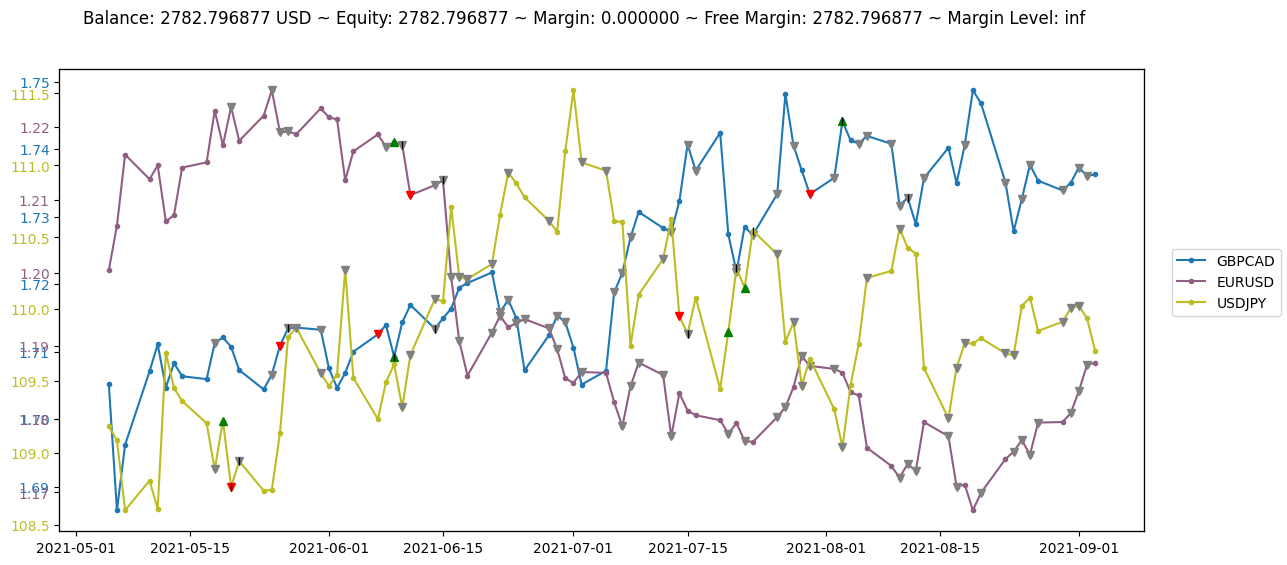

In [9]:
env.render('simple_figure')

#### Render in *advanced_figure* mode

* Clicking on a symbol name will hide/show its plot.
* Hovering over points and markers will display their detail.
* The size of triangles indicates their relative volume.

In [10]:
env.render('advanced_figure', time_format="%Y-%m-%d")

### A Complete Example using `stable-baselines`

In [11]:
import gymnasium as gym
from gym_mtsim import (
    Timeframe, SymbolInfo,
    MtSimulator, OrderType, Order, SymbolNotFound, OrderNotFound,
    MtEnv,
    FOREX_DATA_PATH, STOCKS_DATA_PATH, CRYPTO_DATA_PATH, MIXED_DATA_PATH,
)
from stable_baselines3 import A2C
from stable_baselines3.common.vec_env import DummyVecEnv
import random
import numpy as np
import torch

env_name = 'forex-hedge-v0'

# reproduce training and test
seed = 2024
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

env = gym.make(env_name)
model = A2C('MultiInputPolicy', env, verbose=0)
model.learn(total_timesteps=1000)

observation, info = env.reset(seed=seed)

while True:
    action, _states = model.predict(observation)
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

    if done:
        break

env.unwrapped.render('advanced_figure', time_format='%Y-%m-%d')

## References

* [https://www.mql5.com/en/docs/python_metatrader5](https://www.mql5.com/en/docs/python_metatrader5)
* [https://www.metatrader5.com/en/terminal/help/trading_advanced/margin_forex](https://www.metatrader5.com/en/terminal/help/trading_advanced/margin_forex)
* [https://admiralmarkets.com/education/articles/forex-basics/margin-in-forex-trading-margin-level-vs-margin-call](https://admiralmarkets.com/education/articles/forex-basics/margin-in-forex-trading-margin-level-vs-margin-call)
* [https://www.investopedia.com/articles/forex/12/calculating-profits-and-losses-of-forex-trades.asp](https://www.investopedia.com/articles/forex/12/calculating-profits-and-losses-of-forex-trades.asp)
